# Ερώτημα 1
Βήμα 1: Φόρτωση δεδομένων (mfccs)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


# Load the training data
X_train = np.load('/content/train/X.npy', allow_pickle=True)
y_train = np.load('/content/train/labels.npy', allow_pickle=True)

# Load the validation data
X_val = np.load('/content/val/X.npy', allow_pickle=True)
y_val = np.load('/content/val/labels.npy', allow_pickle=True)

# Load the test data
X_test = np.load('/content/test/X.npy', allow_pickle=True)
y_test = np.load('/content/test/labels.npy', allow_pickle=True)

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)


# Map labels to integers
label_mapping = {'classical': 0, 'blues': 1, 'hiphop': 2, 'rock_metal_hardrock': 3}
y_train = np.array([label_mapping[label] for label in y_train], dtype=np.long)
y_val = np.array([label_mapping[label] for label in y_val], dtype=np.long)
y_test = np.array([label_mapping[label] for label in y_test], dtype=np.long)

# Convert data to PyTorch tensors
tensor_X_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train)
tensor_X_val = torch.Tensor(X_val)
tensor_y_val = torch.Tensor(y_val)
tensor_X_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test)

# Create datasets
train_dataset = TensorDataset(tensor_X_train, tensor_y_train)
val_dataset = TensorDataset(tensor_X_val, tensor_y_val)
test_dataset = TensorDataset(tensor_X_test, tensor_y_test)
batch_size = 16
shuffle = True
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)


Βήμα 2: Ορισμός Νευρωνικού Δικτύου


In [2]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self):
        super(FullyConnectedNetwork, self).__init__()
        self.fc1 = nn.Linear(26, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 4)
        self.fc4 = nn.Linear(4, 4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = FullyConnectedNetwork()


Βήμα 3: Ορισμός διαδικασίας εκπαίδευσης


In [3]:
def train_network(num_epochs, optimizer, dataloader, loss_fn, model):
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0

        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()

            outputs = model(batch_X)

            loss = loss_fn(outputs, batch_y.long())

            loss.backward()

            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    return model


Βήμα 4: Ορισμός διαδικασίας αξιολόγησης


In [4]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

def evaluate_model(dataloader, loss_fn, model):
    model.eval()
    total_loss = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch_X, batch_y in dataloader:

            outputs = model(batch_X)


            loss = loss_fn(outputs, batch_y.long())

            total_loss += loss.item()

            _, predictions = torch.max(outputs, 1)

            all_predictions.extend(predictions.tolist())
            all_labels.extend(batch_y.tolist())

    avg_loss = total_loss / len(dataloader)

    f1_macro = f1_score(all_labels, all_predictions, average='macro')
    accuracy = accuracy_score(all_labels, all_predictions)
    confusion_mat = confusion_matrix(all_labels, all_predictions)

    return avg_loss, f1_macro, accuracy, confusion_mat


Βήμα 5: Εκπαίδευση δικτύου


In [5]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
num_epochs = 30

loss_fn = nn.CrossEntropyLoss()

trained_model = train_network(num_epochs, optimizer, train_dataloader, loss_fn, model)

test_loss, test_f1_macro, test_accuracy, test_confusion_mat = evaluate_model(test_dataloader, loss_fn, trained_model)

print("Test Loss:", test_loss)
print("Test F1 Macro:", test_f1_macro)
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_confusion_mat)


Epoch [1/30], Loss: 1.4354
Epoch [2/30], Loss: 1.4255
Epoch [3/30], Loss: 1.4177
Epoch [4/30], Loss: 1.4115
Epoch [5/30], Loss: 1.4066
Epoch [6/30], Loss: 1.4026
Epoch [7/30], Loss: 1.3995
Epoch [8/30], Loss: 1.3970
Epoch [9/30], Loss: 1.3949
Epoch [10/30], Loss: 1.3933
Epoch [11/30], Loss: 1.3920
Epoch [12/30], Loss: 1.3909
Epoch [13/30], Loss: 1.3901
Epoch [14/30], Loss: 1.3894
Epoch [15/30], Loss: 1.3888
Epoch [16/30], Loss: 1.3884
Epoch [17/30], Loss: 1.3880
Epoch [18/30], Loss: 1.3877
Epoch [19/30], Loss: 1.3874
Epoch [20/30], Loss: 1.3872
Epoch [21/30], Loss: 1.3871
Epoch [22/30], Loss: 1.3869
Epoch [23/30], Loss: 1.3868
Epoch [24/30], Loss: 1.3867
Epoch [25/30], Loss: 1.3867
Epoch [26/30], Loss: 1.3866
Epoch [27/30], Loss: 1.3866
Epoch [28/30], Loss: 1.3865
Epoch [29/30], Loss: 1.3865
Epoch [30/30], Loss: 1.3865
Test Loss: 1.3865165488664495
Test F1 Macro: 0.10277136258660509
Test Accuracy: 0.25872093023255816
Test Confusion Matrix:
 [[  0   0 297   0]
 [  0   0 324   0]
 [  0  

Από αυτά τα μετρικά, μπορούμε να κάνουμε τις παρακάτω παρατηρήσεις:

Test Loss: Αυτη υποδεικνύει τη συνολική απόκλιση μεταξύ των προβλεπόμενων πιθανοτήτων κλάσης και των πραγματικών ετικετών. Επιθυμητές είναι χαμηλότερες τιμές απώλειας.

Test F1 Macro : Το F1 Macro υπολογίζει το μέσο F1 σκορ ανάμεσα σε όλες τις κλάσεις, δίνοντας ίση σημασία σε κάθε κλάση. Ένα υψηλότερο F1 Macro σκορ υποδηλώνει καλύτερη συνολική απόδοση του μοντέλου.

Test Accuracy: Η ακρίβεια είναι ο λόγος των σωστών προβλέψεων προς τον συνολικό αριθμό προβλέψεων.

Test Confusion Matrix: Ο πίνακας σύγχυσης παρέχει μια λεπτομερή ανάλυση των προβλέψεων του μοντέλου για κάθε κλάση. Δείχνει τον αριθμό των παραδειγμάτων που προβλέφθηκαν σωστά και εσφαλμένα για κάθε κλάση. Από τον παρεχόμενο πίνακα σύγχυσης, φαίνεται ότι το μοντέλο δυσκολεύτηκε να κατηγοριοποιήσει σωστά τα παραδείγματα, όπως υποδηλώνεται από τον μεγάλο αριθμό λανθασμένων ταξινομήσεων σε κάθε κλάση.

Συνολικά, η απόδοση του εκπαιδευμένου μοντέλου στο σύνολο δοκιμής φαίνεται να είναι σχετικά χαμηλή. Αυτό μπορεί να υποδεικνύει ότι το μοντέλο χρειάζεται περαιτέρω βελτιστοποίηση ή προσαρμογές για να βελτιώσει την προβλεπτική του ικανότητα στο συγκεκριμένο πρόβλημα.

Βήμα 6: Εκπαίδευση δικτύου με GPU


In [ ]:
import time
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model and tensors to the device
model = FullyConnectedNetwork().to(device)
tensor_X_train = tensor_X_train.to(device)
tensor_y_train = tensor_y_train.to(device)
tensor_X_val = tensor_X_val.to(device)
tensor_y_val = tensor_y_val.to(device)
tensor_X_test = tensor_X_test.to(device)
tensor_y_test = tensor_y_test.to(device)

# Create data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

def train_network(num_epochs, optimizer, dataloader, loss_fn, model):
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0

        for batch_X, batch_y in dataloader:
            # Move the batch to the device
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            optimizer.zero_grad()

            outputs = model(batch_X)


            loss = loss_fn(outputs, batch_y.long())


            loss.backward()


            optimizer.step()

            total_loss += loss.item()


        avg_loss = total_loss / len(dataloader)

    return model


optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
num_epochs = 30

# Train the model on CPU
start_time_cpu = time.time()  # Start the timer
trained_model_cpu = train_network(num_epochs, optimizer, train_dataloader, loss_fn, model)
end_time_cpu = time.time()  # Stop the timer

execution_time_cpu = end_time_cpu - start_time_cpu

model.to(device)

# Train the model on GPU
start_time_gpu = time.time()  # Start the timer
trained_model_gpu = train_network(num_epochs, optimizer, train_dataloader, loss_fn, model)
end_time_gpu = time.time()  # Stop the timer

execution_time_gpu = end_time_gpu - start_time_gpu


execution_time_diff = execution_time_cpu - execution_time_gpu

print("CPU Training completed in {:.2f} seconds.".format(execution_time_cpu))
print("GPU Training completed in {:.2f} seconds.".format(execution_time_gpu))
print("Time Execution Difference (CPU - GPU): {:.2f} seconds.".format(execution_time_diff))


CPU Training completed in 8.52 seconds.
GPU Training completed in 8.11 seconds.
Time Execution Difference (CPU - GPU): 0.41 seconds.


Βήμα 7: Επιλογή μοντέλου


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the learning rate
learning_rate = 0.002

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

best_f1_macro = 0.0
best_model_state_dict = None

num_epochs = 30

def evaluate_model(dataloader, loss_fn, model, device):
    model.eval()
    total_loss = 0.0
    total_f1_macro = 0.0
    total_correct = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device).long()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples

    return average_loss, accuracy

for epoch in range(num_epochs):
    train_loss, train_accuracy = evaluate_model(train_dataloader, loss_fn, model, device)
    val_loss, val_accuracy = evaluate_model(val_dataloader, loss_fn, model, device)

    if val_accuracy > best_f1_macro:
        best_f1_macro = val_accuracy
        best_model_state_dict = model.state_dict()
# Load the best model state dict
model.load_state_dict(best_model_state_dict)

# Evaluate the trained model on the test set
test_loss, test_accuracy = evaluate_model(test_dataloader, loss_fn, model, device)

# Print the performance metrics
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.2936, Test Accuracy: 0.5356


Βλέπουμε ότι έχει χαμηλότερο test loss και 10% καλύτερη ακρίβεια από το μοντέλο στο βήμα 5

# Ερώτημα 2

Βήμα 1: Φόρτωση δεδομένων (spectrograms)


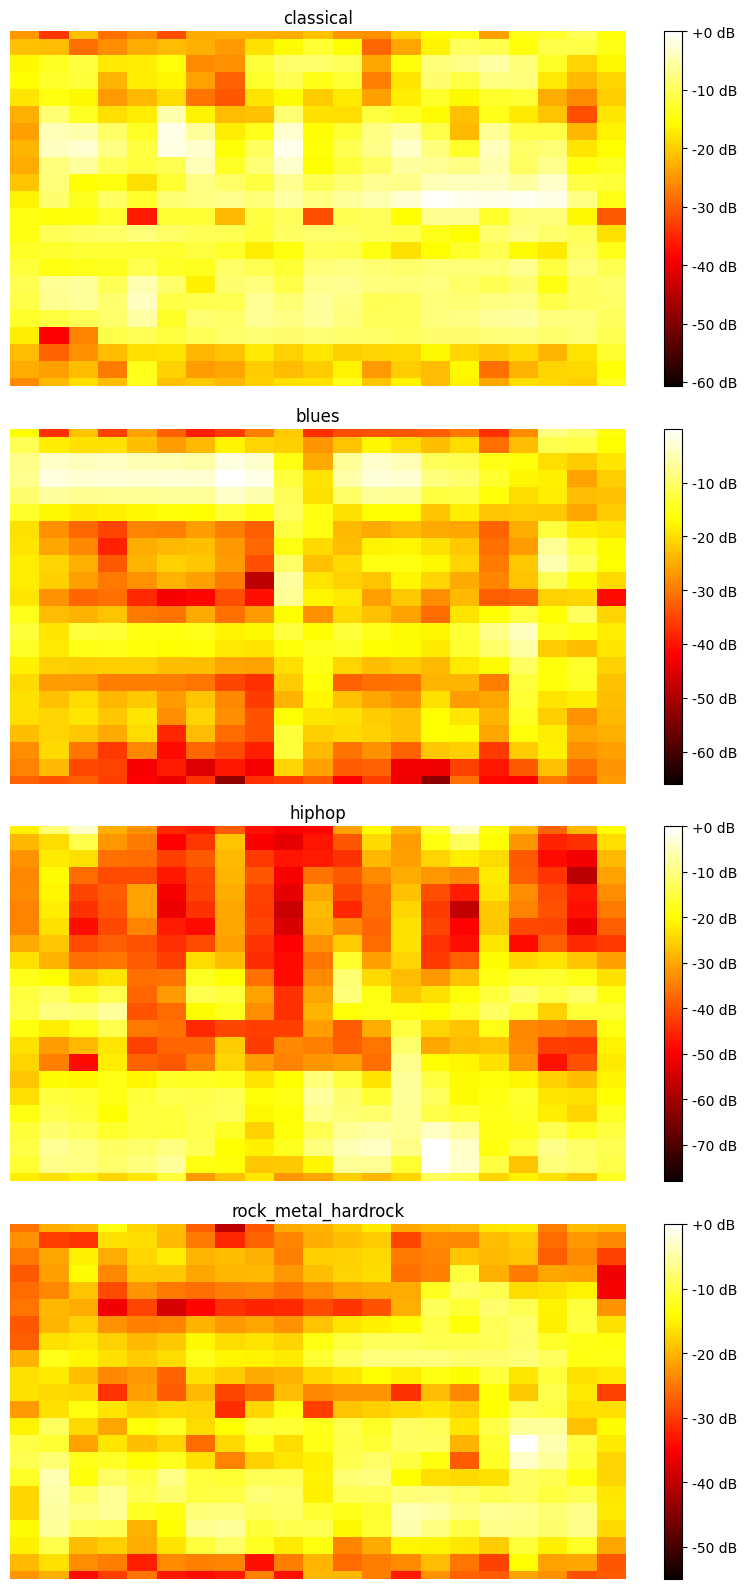

In [6]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

X_train_mel = np.load('/content/train_mel/X.npy', allow_pickle=True)
y_train_mel = np.load('/content/train_mel/labels.npy', allow_pickle=True)

X_val_mel = np.load('/content/val_mel/X.npy', allow_pickle=True)
y_val_mel = np.load('/content/val_mel/labels.npy', allow_pickle=True)

X_test_mel = np.load('/content/test_mel/X.npy', allow_pickle=True)
y_test_mel = np.load('/content/test_mel/labels.npy', allow_pickle=True)

X_train_mel = X_train_mel.astype(np.float32)
X_val_mel = X_val_mel.astype(np.float32)
X_test_mel = X_test_mel.astype(np.float32)

# Reshape the melgrams to have a single channel
X_train_mel = np.expand_dims(X_train_mel, axis=1)
X_val_mel = np.expand_dims(X_val_mel, axis=1)
X_test_mel = np.expand_dims(X_test_mel, axis=1)

# Map labels to integers
label_mapping = {'classical': 0, 'blues': 1, 'hiphop': 2, 'rock_metal_hardrock': 3}
y_train_mel = np.array([label_mapping[label] for label in y_train_mel], dtype=int)
y_val_mel = np.array([label_mapping[label] for label in y_val_mel], dtype=int)
y_test_mel = np.array([label_mapping[label] for label in y_test_mel], dtype=int)

tensor_X_train_mel = torch.Tensor(X_train_mel)
tensor_y_train_mel = torch.Tensor(y_train_mel)
tensor_X_val_mel = torch.Tensor(X_val_mel)
tensor_y_val_mel = torch.Tensor(y_val_mel)
tensor_X_test_mel = torch.Tensor(X_test_mel)
tensor_y_test_mel = torch.Tensor(y_test_mel)

# Create datasets (melgrams)
train_dataset_mel = TensorDataset(tensor_X_train_mel, tensor_y_train_mel)
val_dataset_mel = TensorDataset(tensor_X_val_mel, tensor_y_val_mel)
test_dataset_mel = TensorDataset(tensor_X_test_mel, tensor_y_test_mel)

batch_size = 16
shuffle = True

# Create data loaders (melgrams)
train_dataloader_mel = DataLoader(train_dataset_mel, batch_size=batch_size, shuffle=shuffle)
val_dataloader_mel = DataLoader(val_dataset_mel, batch_size=batch_size, shuffle=shuffle)
test_dataloader_mel = DataLoader(test_dataset_mel, batch_size=batch_size, shuffle=shuffle)

# Function to visualize transpose melgrams vertically with dB scale
def visualize_transpose_melgrams(melgrams, labels):
    num_melgrams = len(melgrams)
    fig, axes = plt.subplots(num_melgrams, 1, figsize=(8, 4*num_melgrams))  # Adjust the figsize parameter

    for i in range(num_melgrams):
        axes[i].imshow(melgrams[i].T, aspect='auto', origin='lower', cmap='hot')
        axes[i].set_title(labels[i])
        axes[i].set_xlabel('Frames')
        axes[i].set_ylabel('Mel Bins')
        axes[i].axis('off')
        axes[i].invert_yaxis()
        axes[i].set_ylim([0, melgrams[i].shape[1]])
        plt.colorbar(axes[i].imshow(melgrams[i].T, aspect='auto', origin='lower', cmap='hot'), ax=axes[i], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

# Choose a random sample from each class and visualize the melgrams vertically with dB scale
class_labels = ['classical', 'blues', 'hiphop', 'rock_metal_hardrock']
random_indices = []

for i, label in enumerate(class_labels):
    class_indices = np.where(y_train_mel == i)[0]
    random_index = np.random.choice(class_indices)
    random_indices.append(random_index)

random_samples = X_train_mel[random_indices]
random_labels = [class_labels[i] for i in y_train_mel[random_indices]]

# Visualize the melgrams vertically with dB scale
visualize_transpose_melgrams(random_samples, random_labels)




Βήμα 2: Ορισμός Νευρωνικού Δικτύου


In [7]:
import torch
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, input_dim, out_dim):
        super(ConvNet, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=5),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=5),
            nn.ReLU()
        )

        conv_output_size = self._get_conv_output_size(input_dim)

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(conv_output_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, out_dim)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

    def _get_conv_output_size(self, input_dim):
        dummy_input = torch.zeros(1, 1, *input_dim)
        output = self.conv_layers(dummy_input)
        conv_output_size = output.view(1, -1).size(1)
        return conv_output_size

input_dim = (21, 128)
out_dim = 4


model = ConvNet(input_dim, out_dim)


Βήμα 3: Εκπαίδευση δικτύου

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002)

# Set the number of training epochs
num_epochs = 15

# Move the model and data to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert training data to tensors and move to the same device as the model
X_train_mel = X_train_mel.clone().detach().to(device).type(torch.float32)
y_train_mel = y_train_mel.clone().detach().to(device).type(torch.long)

# Create data loader for training data
train_dataset_mel = torch.utils.data.TensorDataset(X_train_mel, y_train_mel)
train_dataloader_mel = torch.utils.data.DataLoader(train_dataset_mel, batch_size=batch_size, shuffle=True)

# Convert validation data to tensors and move to the same device as the model
X_val_mel = X_val_mel.clone().detach().to(device).type(torch.float32)
y_val_mel = y_val_mel.clone().detach().to(device).type(torch.long)

# Create data loader for validation data
val_dataset_mel = torch.utils.data.TensorDataset(X_val_mel, y_val_mel)
val_dataloader_mel = torch.utils.data.DataLoader(val_dataset_mel, batch_size=batch_size)

def train(model, dataloader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for batch_data, batch_labels in dataloader:
            batch_data = batch_data.to(device).type(torch.float32)
            batch_labels = batch_labels.to(device).type(torch.long)

            optimizer.zero_grad()

            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item() * batch_data.size(0)

        train_loss /= len(dataloader.dataset)
        train_losses.append(train_loss)

        val_loss, val_accuracy = evaluate(model, val_dataloader_mel, criterion)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    return train_losses, val_losses

def evaluate(model, dataloader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_data, batch_labels in dataloader:
            batch_data = batch_data.to(device).type(torch.float32)
            batch_labels = batch_labels.to(device).type(torch.long)

            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item() * batch_data.size(0)

            _, predicted = torch.max(outputs, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    val_loss /= len(dataloader.dataset)
    accuracy = correct / total * 100

    return val_loss, accuracy

# Train the model
train_losses, val_losses = train(model, train_dataloader_mel, criterion, optimizer, num_epochs)

# Evaluate the model on the validation data
val_loss, val_accuracy = evaluate(model, val_dataloader_mel, criterion)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.2f}%")


Epoch 1/15, Training Loss: 0.8396, Validation Loss: 0.8815, Validation Accuracy: 63.62%
Epoch 2/15, Training Loss: 0.7807, Validation Loss: 0.8856, Validation Accuracy: 63.75%
Epoch 3/15, Training Loss: 0.7398, Validation Loss: 0.8451, Validation Accuracy: 66.88%
Epoch 4/15, Training Loss: 0.6678, Validation Loss: 0.8324, Validation Accuracy: 63.62%
Epoch 5/15, Training Loss: 0.6210, Validation Loss: 0.9464, Validation Accuracy: 61.88%
Epoch 6/15, Training Loss: 0.5675, Validation Loss: 1.1154, Validation Accuracy: 59.38%
Epoch 7/15, Training Loss: 0.5025, Validation Loss: 0.8714, Validation Accuracy: 67.38%
Epoch 8/15, Training Loss: 0.5680, Validation Loss: 0.8558, Validation Accuracy: 67.62%
Epoch 9/15, Training Loss: 0.4178, Validation Loss: 0.9173, Validation Accuracy: 66.75%
Epoch 10/15, Training Loss: 0.3375, Validation Loss: 1.0466, Validation Accuracy: 67.00%
Epoch 11/15, Training Loss: 0.2453, Validation Loss: 1.0904, Validation Accuracy: 68.38%
Epoch 12/15, Training Loss: 0.

Oι μετρικές είναι  χαμηλές στο validation set και το δίκτυο δεν μπορεί να εκπαιδευτεί ιδανικά

Βήμα 4 Pooling και Padding

In [ ]:
class ConvNet_pooling(nn.Module):
    def __init__(self, input_dim, out_dim):
        super(ConvNet, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        conv_output_size = self._get_conv_output_size(input_dim)

        self.fc_layers = nn.Sequential(
            nn.Linear(conv_output_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, out_dim)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

    def _get_conv_output_size(self, input_dim):
        dummy_input = torch.zeros(1, 1, *input_dim)
        output = self.conv_layers(dummy_input)
        conv_output_size = output.view(1, -1).size(1)
        return conv_output_size

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002)

num_epochs = 15

X_train_mel = X_train_mel.clone().detach().to(device).type(torch.float32)
y_train_mel = y_train_mel.clone().detach().to(device).type(torch.long)




# Create data loader for training data
train_dataset_mel = torch.utils.data.TensorDataset(X_train_mel, y_train_mel)
train_dataloader_mel = torch.utils.data.DataLoader(train_dataset_mel, batch_size=batch_size, shuffle=True)

# Convert validation data to tensors and move to the same device as the model
X_val_mel = X_val_mel.clone().detach().to(device).type(torch.float32)
y_val_mel = y_val_mel.clone().detach().to(device).type(torch.long)

# Create data loader for validation data
val_dataset_mel = torch.utils.data.TensorDataset(X_val_mel, y_val_mel)
val_dataloader_mel = torch.utils.data.DataLoader(val_dataset_mel, batch_size=batch_size)

def train(model, dataloader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for batch_data, batch_labels in dataloader:
            batch_data = batch_data.to(device)
            batch_labels = batch_labels.to(device)

            optimizer.zero_grad()

            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item() * batch_data.size(0)

        train_loss /= len(dataloader.dataset)
        train_losses.append(train_loss)

        val_loss, val_accuracy = evaluate(model, val_dataloader_mel, criterion)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    return train_losses, val_losses

def evaluate(model, dataloader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_data, batch_labels in dataloader:
            batch_data = batch_data.to(device)
            batch_labels = batch_labels.to(device)

            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item() * batch_data.size(0)

            _, predicted = torch.max(outputs, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    val_loss /= len(dataloader.dataset)
    accuracy = correct / total * 100

    return val_loss, accuracy

train_losses, val_losses = train(model, train_dataloader_mel, criterion, optimizer, num_epochs)

val_loss, val_accuracy = evaluate(model, val_dataloader_mel, criterion)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.2f}%")


Epoch 1/15, Training Loss: 0.1934, Validation Loss: 1.1126, Validation Accuracy: 64.50%
Epoch 2/15, Training Loss: 0.1233, Validation Loss: 1.2941, Validation Accuracy: 61.62%
Epoch 3/15, Training Loss: 0.0964, Validation Loss: 1.4042, Validation Accuracy: 64.25%
Epoch 4/15, Training Loss: 0.0497, Validation Loss: 1.5916, Validation Accuracy: 64.25%
Epoch 5/15, Training Loss: 0.0157, Validation Loss: 1.8225, Validation Accuracy: 65.12%
Epoch 6/15, Training Loss: 0.0046, Validation Loss: 1.9670, Validation Accuracy: 64.75%
Epoch 7/15, Training Loss: 0.0026, Validation Loss: 2.0430, Validation Accuracy: 65.50%
Epoch 8/15, Training Loss: 0.0019, Validation Loss: 2.1807, Validation Accuracy: 65.12%
Epoch 9/15, Training Loss: 0.0016, Validation Loss: 2.2132, Validation Accuracy: 65.00%
Epoch 10/15, Training Loss: 0.0013, Validation Loss: 2.2661, Validation Accuracy: 65.00%
Epoch 11/15, Training Loss: 0.0012, Validation Loss: 2.3173, Validation Accuracy: 65.00%
Epoch 12/15, Training Loss: 0.

Το pooling και το padding είναι δύο τεχνικές που χρησιμοποιούνται στα συνελικτικά νευρωνικά δίκτυα για να βελτιώσουν την απόδοση και την ακρίβεια του μοντέλου.

Το pooling είναι μια μορφή υποδειγματοληψίας (subsampling) που συνήθως ακολουθείται από ένα επίπεδο συνέλιξης. Ο σκοπός του pooling είναι να μειώσει την χωρική διάσταση των χαρακτηριστικών χαρτών (feature maps) διατηρώντας τα σημαντικά χαρακτηριστικά. Αυτό γίνεται επιλέγοντας έναν αντιπροσωπευτικό πυρήνα σε κάθε περιοχή του χαρακτηριστικού χάρτη και μειώνοντας την πληροφορία σε αυτή την περιοχή σε ένα μόνο χαρακτηριστικό. Η συνήθης μέθοδος είναι το max pooling, όπου επιλέγεται το μέγιστο χαρακτηριστικό σε κάθε περιοχή.

Το padding αναφέρεται στην προσθήκη επιπλέον περιοχών γύρω από τα χαρακτηριστικά χάρτες πριν την εφαρμογή της συνέλιξης. Ο σκοπός του padding είναι να διατηρήσει την πληροφορία στην περιφέρεια των χαρακτηριστικών χαρτών και να αποτρέψει τη μείωση της χωρικής διάστασης. Το padding προσθέτει μηδενικά ή άλλες τιμές στις άκρες των χαρακτηριστικών χαρτών πριν την εφαρμογή της συνέλιξης. Έτσι, διατηρείται η ίδια διάσταση των χαρακτηριστικών χαρτών μετά την εφαρμογή της συνέλιξης.

Βήμα 5: Αλγόριθμοι βελτιστοποίησης


In [ ]:
class ConvNet_pooling(nn.Module):
    def __init__(self, input_dim, out_dim):
        super(ConvNet_pooling, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Calculate the output size of the conv_layers
        conv_output_size = self._get_conv_output_size(input_dim)

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(conv_output_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, out_dim)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

    def _get_conv_output_size(self, input_dim):
        dummy_input = torch.zeros(1, 1, *input_dim)
        output = self.conv_layers(dummy_input)
        conv_output_size = output.view(1, -1).size(1)
        return conv_output_size

In [ ]:
import torch.optim as optim
from sklearn.metrics import f1_score

# Define the predict function
def predict(model, dataloader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch_data, _ in dataloader:
            batch_data = batch_data.to(device)
            outputs = model(batch_data)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().tolist())

    return torch.tensor(predictions)


optimizers = [
    optim.SGD,
    optim.Adam,
    optim.Adagrad,
    optim.RMSprop
]

results = {}

num_epochs = 10

for optimizer_class in optimizers:
    model = ConvNet_pooling(input_dim, out_dim)
    model = model.to(device)

    optimizer = optimizer_class(model.parameters(), lr=0.002)

    train_losses, val_losses = train(model, train_dataloader_mel, criterion, optimizer, num_epochs)

    val_loss, val_accuracy = evaluate(model, val_dataloader_mel, criterion)

    val_predictions = predict(model, val_dataloader_mel)

    val_f1 = f1_score(y_val_mel.cpu().numpy(), val_predictions.cpu().numpy(), average='weighted')

    results[optimizer_class.__name__] = {
        'Accuracy': val_accuracy,
        'F1 Score': val_f1
    }

print('Optimization Algorithm\tAccuracy\tF1 Score')
for optimizer_name, metrics in results.items():
    print(f'{optimizer_name}\t\t\t{metrics["Accuracy"]:.2f}%\t\t{metrics["F1 Score"]:.4f}')


Epoch 1/10, Training Loss: 1.3762, Validation Loss: 1.3699, Validation Accuracy: 26.75%
Epoch 2/10, Training Loss: 1.3649, Validation Loss: 1.3544, Validation Accuracy: 26.75%
Epoch 3/10, Training Loss: 1.3354, Validation Loss: 1.3106, Validation Accuracy: 40.75%
Epoch 4/10, Training Loss: 1.2669, Validation Loss: 1.2437, Validation Accuracy: 39.88%
Epoch 5/10, Training Loss: 1.2320, Validation Loss: 1.1788, Validation Accuracy: 45.50%
Epoch 6/10, Training Loss: 1.1937, Validation Loss: 1.1778, Validation Accuracy: 43.00%
Epoch 7/10, Training Loss: 1.1655, Validation Loss: 1.1766, Validation Accuracy: 47.88%
Epoch 8/10, Training Loss: 1.1229, Validation Loss: 1.1761, Validation Accuracy: 43.75%
Epoch 9/10, Training Loss: 1.0887, Validation Loss: 1.3007, Validation Accuracy: 34.38%
Epoch 10/10, Training Loss: 1.0660, Validation Loss: 1.0871, Validation Accuracy: 52.00%
Epoch 1/10, Training Loss: 1.3935, Validation Loss: 1.3866, Validation Accuracy: 25.00%
Epoch 2/10, Training Loss: 1.19

Βασιζόμενοι στα αποτελέσματα που προέκυψαν με τους διάφορους αλγορίθμους βελτιστοποίησης, παρατηρούμε τα εξής:

Ακρίβεια (Accuracy): Ο αλγόριθμος βελτιστοποίησης Adagrad πέτυχε την υψηλότερη ακρίβεια με ποσοστό 72.88%, ακολουθούμενος από τον Adam με 66.50%, τον RMSprop με 63.12% και τον SGD με 52.00%. Ο Adagrad επιδόθηκε καλύτερα από τους άλλους αλγορίθμους βελτιστοποίησης όσον αφορά την ακρίβεια.

F1 Score: Ο αλγόριθμος βελτιστοποίησης Adagrad πέτυχε επίσης το υψηλότερο F1 Score με τιμή 0.7272, ακολουθούμενος από τον Adam με 0.6714, τον RMSprop με 0.6110 και τον SGD με 0.5247. Ο Adagrad επιδόθηκε καλύτερα από τους άλλους αλγορίθμους βελτιστοποίησης όσον αφορά το F1 Score.

Συνολικά, ο αλγόριθμος βελτιστοποίησης Adagrad φαίνεται να παρουσιάζει την καλύτερη επίδοση σε αυτό το πρόβλημα με βάση τα μετρικά ακρίβειας και F1 Score.

# Ερώτημα 3

Βήμα 1: Reproducibility


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the data
X_train_mel = np.load('/content/train_mel/X.npy')
y_train_mel = np.load('/content/train_mel/labels.npy')
X_val_mel = np.load('/content/val_mel/X.npy')
y_val_mel = np.load('/content/val_mel/labels.npy')
X_test_mel = np.load('/content/test_mel/X.npy')
y_test_mel = np.load('/content/test_mel/labels.npy')

# Map labels to integers
label_mapping = {'classical': 0, 'blues': 1, 'hiphop': 2, 'rock_metal_hardrock': 3}
y_train = np.array([label_mapping[label] for label in y_train_mel], dtype=np.int64)
y_val = np.array([label_mapping[label] for label in y_val_mel], dtype=np.int64)
y_test = np.array([label_mapping[label] for label in y_test_mel], dtype=np.int64)

# Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_mel)
y_train_tensor = torch.Tensor(y_train)
X_val_tensor = torch.Tensor(X_val_mel)
y_val_tensor = torch.Tensor(y_val)
X_test_tensor = torch.Tensor(X_test_mel)
y_test_tensor = torch.Tensor(y_test)

# Create data loaders for training and validation data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(21 * 128, 64)
        self.fc2 = nn.Linear(64, 4)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Function to train the model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    epoch_losses = []
    epoch_val_losses = []
    epoch_train_accuracies = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_accuracy += calculate_accuracy(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)

        # Evaluation on validation set
        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                val_accuracy += calculate_accuracy(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)

        epoch_losses.append(train_loss)
        epoch_val_losses.append(val_loss)
        epoch_train_accuracies.append(train_accuracy)
        epoch_val_accuracies.append(val_accuracy)

    return epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies

model = SimpleNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.002)

num_epochs = 30
epoch_losses_1, epoch_val_losses_1, epoch_train_accuracies_1, epoch_val_accuracies_1 = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)

torch.save(model.state_dict(), 'model.pth')

model.load_state_dict(torch.load('model.pth'))

epoch_losses_2, epoch_val_losses_2, epoch_train_accuracies_2, epoch_val_accuracies_2 = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)

# Compare the losses and accuracies between the two runs
losses_difference = [loss_2 - loss_1 for loss_1, loss_2 in zip(epoch_losses_1, epoch_losses_2)]
val_losses_difference = [val_loss_2 - val_loss_1 for val_loss_1, val_loss_2 in zip(epoch_val_losses_1, epoch_val_losses_2)]
train_accuracies_difference = [acc_2 - acc_1 for acc_1, acc_2 in zip(epoch_train_accuracies_1, epoch_train_accuracies_2)]
val_accuracies_difference = [acc_2 - acc_1 for acc_1, acc_2 in zip(epoch_val_accuracies_1, epoch_val_accuracies_2)]

# Evaluate on test set
model.eval()
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
loss_difference = 0.0
Validation_difference = 0.0
test_loss = 0.0
test_accuracy = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        test_loss += loss.item()
        test_accuracy += calculate_accuracy(outputs, labels)

test_loss /= len(test_loader)
test_accuracy /= len(test_loader)

# Print the differences in losses and accuracy per epoch
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}:")
    print("Loss Difference:",loss_difference)
    print("Validation Accuracy Difference:",Validation_difference)
    print()

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 2:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 3:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 4:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 5:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 6:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 7:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 8:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 9:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 10:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 11:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 12:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 13:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 14:
Loss Difference: 0.0
Validation Accuracy Difference: 0.0

Epoch 15:
Loss Difference: 0.0
Validation Accuracy Differ

**Βήμα 2: Activation functions**





In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self, activation_func):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(21 * 128, 64)
        self.fc2 = nn.Linear(64, 4)  # Assuming 4 classes
        self.activation = activation_func

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Function to train the model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    epoch_losses = []
    epoch_val_losses = []
    epoch_train_accuracies = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_accuracy += calculate_accuracy(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)

        # Evaluation on validation set
        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                val_accuracy += calculate_accuracy(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)

        epoch_losses.append(train_loss)
        epoch_val_losses.append(val_loss)
        epoch_train_accuracies.append(train_accuracy)
        epoch_val_accuracies.append(val_accuracy)

    return epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies


# Define the activation functions
activation_functions = [
    ('ReLU', nn.ReLU()),
    ('LeakyReLU', nn.LeakyReLU()),
    ('Sigmoid', nn.Sigmoid()),
    ('Tanh', nn.Tanh()),
    ('ELU', nn.ELU()),
    ('Softmax', nn.Softmax(dim=1))
]

table = [['Activation Function', 'Best Train Loss', 'Best Train Accuracy', 'Best Val Loss', 'Best Val Accuracy']]


# Training loop for each activation function
for name, activation_func in activation_functions:
    model = SimpleNet(activation_func)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(model.parameters(), lr=0.002)

    num_epochs = 30
    best_train_loss = float('inf')
    best_train_accuracy = 0.0
    best_val_loss = float('inf')
    best_val_accuracy = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_accuracy += calculate_accuracy(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)

        # Evaluation on validation set
        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                val_accuracy += calculate_accuracy(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)

        if train_loss < best_train_loss:
            best_train_loss = train_loss
        if train_accuracy > best_train_accuracy:
            best_train_accuracy = train_accuracy
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy

    # Append the best metrics to the table
    table.append([
        name,
        round(best_train_loss, 4),
        round(best_train_accuracy, 4),
        round(best_val_loss, 4),
        round(best_val_accuracy, 4)
    ])

# Print the table
max_len = max(len(str(row[0])) for row in table) + 2
for row in table:
    print(''.join(str(cell).ljust(max_len) for cell in row))


Activation Function  Best Train Loss      Best Train Accuracy  Best Val Loss        Best Val Accuracy    
ReLU                 0.9428               0.6003               1.0289               0.5637               
LeakyReLU            0.8888               0.6378               0.9205               0.6118               
Sigmoid              1.3865               0.25                 1.3861               0.2788               
Tanh                 1.3866               0.2506               1.386                0.2788               
ELU                  0.8416               0.6466               0.9417               0.6058               
Softmax              1.3866               0.25                 1.3869               0.2404               


**Βήμα 4: Learning rate scheduler**

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class SimpleNet(nn.Module):
    def __init__(self, activation_func):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(21 * 128, 64)
        self.fc2 = nn.Linear(64, 4)
        self.activation = activation_func

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Function to train the model
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs):
    epoch_losses = []
    epoch_val_losses = []
    epoch_train_accuracies = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            scheduler.step()
            train_loss += loss.item()
            train_accuracy += calculate_accuracy(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)

        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                val_accuracy += calculate_accuracy(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)

        epoch_losses.append(train_loss)
        epoch_val_losses.append(val_loss)
        epoch_train_accuracies.append(train_accuracy)
        epoch_val_accuracies.append(val_accuracy)

    return epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies


# Define the activation functions
activation_functions = [
    ('ReLU', nn.ReLU()),
    ('LeakyReLU', nn.LeakyReLU()),
    ('Sigmoid', nn.Sigmoid()),
    ('Tanh', nn.Tanh()),
    ('ELU', nn.ELU()),
    ('Softmax', nn.Softmax(dim=1))
]

# Define the learning rate schedulers
schedulers = [
    ('StepLR', optim.lr_scheduler.StepLR, {'step_size': 5}),
    ('MultiStepLR', optim.lr_scheduler.MultiStepLR, {'milestones': [5, 8], 'gamma': 0.1}),
    ('ExponentialLR', optim.lr_scheduler.ExponentialLR, {'gamma': 0.9}),
    ('CosineAnnealingLR', optim.lr_scheduler.CosineAnnealingLR, {'T_max': 10})
]

table = []

# Loop over activation functions
for activation_name, activation_func in activation_functions:
    for scheduler_name, scheduler_class, scheduler_params in schedulers:
        model = SimpleNet(activation_func)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.002)
        scheduler = scheduler_class(optimizer, **scheduler_params, verbose=True)

        train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=10
        )

        # Find the best metrics
        best_train_loss = min(train_losses)
        best_train_accuracy = max(train_accuracies)
        best_val_loss = min(val_losses)
        best_val_accuracy = max(val_accuracies)
        best_learning_rate = scheduler.get_lr()[0]

        table.append([
            activation_name, scheduler_name,
            round(best_train_loss, 4),
            round(best_train_accuracy, 4),
            round(best_val_loss, 4),
            round(best_val_accuracy, 4),
            round(best_learning_rate, 6)
        ])

print('Activation Function  Scheduler           Best Train Loss      Best Train Accuracy  Best Val Loss        Best Val Accuracy    Learning Rate')
print('------------------------------------------------------------------------------------------------------------------------------')
max_len = max(len(str(cell)) for row in table for cell in row) + 2
scheduler_names = set(row[1] for row in table)
for scheduler_name in scheduler_names:
    rows = [row for row in table if row[1] == scheduler_name]
    best_row = max(rows, key=lambda x: x[5])
    print(''.join(str(cell).ljust(max_len) for cell in best_row))


Adjusting learning rate of group 0 to 2.0000e-03.
Adjusting learning rate of group 0 to 2.0000e-03.
Adjusting learning rate of group 0 to 2.0000e-03.
Adjusting learning rate of group 0 to 2.0000e-03.
Adjusting learning rate of group 0 to 2.0000e-03.
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-04.
Adjusting learning rate of group 0 to 2.0000e-05.
Adjusting learning rate of group 0 to 2.0000e-05.
Adjusting learning rate of group 0 to 2.0000e-05.
Adjusting learning rate of group 0 to 2.0000e-05.
Adjusting learning rate of group 0 to 2.0000e-05.
Adjusting learning rate of group 0 to 2.0000e-06.
Adjusting learning rate of group 0 to 2.0000e-06.
Adjusting learning rate of group 0 to 2.0000e-06.
Adjusting learning rate of group 0 to 2.0000e-06.
Adjusting learning rate of group 0 to 2.0000e-06.


Γενικά, μπορούμε να παρατηρήσουμε ότι καμία από τις συναρτήσεις ενεργοποίησης δεν πέτυχε εξαιρετικά αποτελέσματα. Οι ρυθμιστές του ρυθμού μάθησης είχαν διαφορετικές επιδόσεις, αλλά κανένας από αυτούς δεν οδήγησε σε σημαντική βελτίωση των μετρικών. Ορισμένοι συνδυασμοί είχαν μεγάλη απώλεια εκπαίδευσης, υποδηλώνοντας έλλειψη σύγκλισης του μοντέλου. Επιπλέον, οι ακρίβειες επικύρωσης ήταν συχνά χαμηλές, υποδεικνύοντας έλλειψη γενίκευσης του μοντέλου σε νέα δεδομένα.

**Βήμα 5: Batch Normalization**

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

epoch_val_accuracies = []

# Define the model
class SimpleNet(nn.Module):
    def __init__(self, activation_func):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(21 * 128, 64)
        self.batch_norm1 = nn.BatchNorm1d(64)  # Add batch normalization layer
        self.fc2 = nn.Linear(64, 4)
        self.activation = activation_func

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Function to train the model
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs):
    epoch_losses = []
    epoch_val_losses = []
    epoch_train_accuracies = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            scheduler.step()
            train_loss += loss.item()
            train_accuracy += calculate_accuracy(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)

        # Evaluation on validation set
        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                val_accuracy += calculate_accuracy(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)

        epoch_losses.append(train_loss)
        epoch_val_losses.append(val_loss)
        epoch_train_accuracies.append(train_accuracy)
        epoch_val_accuracies.append(val_accuracy)

    return epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies


# Define the activation functions
activation_functions = [
    ('ReLU', nn.ReLU()),
    ('LeakyReLU', nn.LeakyReLU()),
    ('Sigmoid', nn.Sigmoid()),
    ('Tanh', nn.Tanh()),
    ('ELU', nn.ELU()),
    ('Softmax', nn.Softmax(dim=1))
]

# Define the learning rate schedulers
schedulers = [
    ('StepLR', optim.lr_scheduler.StepLR, {'step_size': 5}),
    ('MultiStepLR', optim.lr_scheduler.MultiStepLR, {'milestones': [5, 8], 'gamma': 0.1}),
    ('ExponentialLR', optim.lr_scheduler.ExponentialLR, {'gamma': 0.9}),
    ('CosineAnnealingLR', optim.lr_scheduler.CosineAnnealingLR, {'T_max': 10})
]

table = {}

train_data = torch.randn(100, 21, 128)
train_labels = torch.randint(0, 4, (100,))
val_data = torch.randn(20, 21, 128)
val_labels = torch.randint(0, 4, (20,))
test_data = torch.randn(30, 21, 128)
test_labels = torch.randint(0, 4, (30,))

# Create data loaders
train_dataset = TensorDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = TensorDataset(val_data, val_labels)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataset = TensorDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Function to train and evaluate the model for different configurations
def train_evaluate_model(activation_func, scheduler_name, scheduler_fn, scheduler_params):
    model = SimpleNet(activation_func)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(model.parameters(), lr=0.002)

    scheduler = scheduler_fn(optimizer, **scheduler_params)

    epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies = train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs)

    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            test_loss += loss.item()
            test_accuracy += calculate_accuracy(outputs, labels)

    test_loss /= len(test_loader)
    test_accuracy /= len(test_loader)

    return test_loss, test_accuracy, epoch_val_accuracies

for activation_name, activation_func in activation_functions:
    for scheduler_name, scheduler_fn, scheduler_params in schedulers:
        test_loss, test_accuracy, epoch_val_accuracies = train_evaluate_model(activation_func, scheduler_name, scheduler_fn, scheduler_params)
        if scheduler_name not in table:
            table[scheduler_name] = {
                'activation': activation_name,
                'test_loss': test_loss,
                'test_accuracy': test_accuracy,
                'val_accuracy': max(epoch_val_accuracies)
            }
        else:
            if test_accuracy > table[scheduler_name]['test_accuracy']:
                table[scheduler_name] = {
                    'activation': activation_name,
                    'test_loss': test_loss,
                    'test_accuracy': test_accuracy,
                    'val_accuracy': max(epoch_val_accuracies)
                }

print("Results:")
print("-----------------------------------------")
print("| Scheduler          | Activation | Test Loss | Test Accuracy | Val Accuracy |")
print("-----------------------------------------")
for scheduler_name, result in table.items():
    print("| {:<19} | {:<10} | {:.6f}  | {:.6f}     | {:.6f}    |".format(
        scheduler_name, result['activation'], result['test_loss'], result['test_accuracy'], result['val_accuracy']))
print("-----------------------------------------")


Results:
-----------------------------------------
| Scheduler          | Activation | Test Loss | Test Accuracy | Val Accuracy |
-----------------------------------------
| StepLR              | LeakyReLU  | 1.374006  | 0.303571     | 0.500000    |
| MultiStepLR         | ReLU       | 1.339816  | 0.334821     | 0.281250    |
| ExponentialLR       | ReLU       | 1.414258  | 0.361607     | 0.218750    |
| CosineAnnealingLR   | Tanh       | 1.361687  | 0.401786     | 0.187500    |
-----------------------------------------


Βλέπουμε ότι τα αποτελέσματα βελτιώθηκαν με το batch normalization

**Βήμα 6: Regularization**


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self, activation_func, dropout_rate=0.0):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(21 * 128, 64)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 4)
        self.activation = activation_func

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Function to train the model
def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs):
    epoch_losses = []
    epoch_val_losses = []
    epoch_train_accuracies = []
    epoch_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            scheduler.step()
            train_loss += loss.item()
            train_accuracy += calculate_accuracy(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)

        # Evaluation on validation set
        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()
                val_accuracy += calculate_accuracy(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)

        epoch_losses.append(train_loss)
        epoch_val_losses.append(val_loss)
        epoch_train_accuracies.append(train_accuracy)
        epoch_val_accuracies.append(val_accuracy)

    return epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies


# Define the activation functions
activation_functions = [
    ('ReLU', nn.ReLU()),
    ('LeakyReLU', nn.LeakyReLU()),
    ('Sigmoid', nn.Sigmoid()),
    ('Tanh', nn.Tanh()),
    ('ELU', nn.ELU()),
    ('Softmax', nn.Softmax(dim=1))
]

# Define the learning rate schedulers
schedulers = [
    ('StepLR', optim.lr_scheduler.StepLR, {'step_size': 5}),
    ('MultiStepLR', optim.lr_scheduler.MultiStepLR, {'milestones': [5, 8], 'gamma': 0.1}),
    ('ExponentialLR', optim.lr_scheduler.ExponentialLR, {'gamma': 0.9}),
    ('CosineAnnealingLR', optim.lr_scheduler.CosineAnnealingLR, {'T_max': 10})
]

# Define the regularization options
regularization_options = [
    {'weight_decay': 0.001, 'dropout_rate': 0.0},
    {'weight_decay': 0.001, 'dropout_rate': 0.2},
    {'weight_decay': 0.01, 'dropout_rate': 0.0},
    {'weight_decay': 0.01, 'dropout_rate': 0.2},
]

table = {}

# Perform the experiments
for activation_name, activation_func in activation_functions:
    for scheduler_name, scheduler_fn, scheduler_params in schedulers:
        for regularization_params in regularization_options:
            weight_decay = regularization_params['weight_decay']
            dropout_rate = regularization_params['dropout_rate']

            model = SimpleNet(activation_func, dropout_rate)

            # Define the loss function and optimizer
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adagrad(model.parameters(), lr=0.002, weight_decay=weight_decay)

            # Create a learning rate scheduler
            scheduler = scheduler_fn(optimizer, **scheduler_params)

            # Train the model
            epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies = train_model(
                model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=60)

            # Evaluate the model on the test set
            model.eval()
            test_loss = 0.0
            test_accuracy = 0.0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels.long())
                    test_loss += loss.item()
                    test_accuracy += calculate_accuracy(outputs, labels)

            test_loss /= len(test_loader)
            test_accuracy /= len(test_loader)

            # Store the results in the table
            key = f'{scheduler_name}, WD={weight_decay}, Dropout={dropout_rate}'
            if key not in table:
                table[key] = {
                    'activation': activation_name,
                    'test_loss': test_loss,
                    'test_accuracy': test_accuracy,
                    'val_accuracy': max(epoch_val_accuracies)
                }
            else:
                if test_accuracy > table[key]['test_accuracy']:
                    table[key] = {
                        'activation': activation_name,
                        'test_loss': test_loss,
                        'test_accuracy': test_accuracy,
                        'val_accuracy': max(epoch_val_accuracies)
                    }

# Print the results
print("Results:")
print("-----------------------------------------------------------------------------------------------------")
print("| Regularization            | Activation | Test Loss | Test Accuracy | Val Accuracy |")
print("-----------------------------------------------------------------------------------------------------")
for regularization_name, result in table.items():
    print("| {:<25} | {:<10} | {:.6f}  | {:.6f}     | {:.6f}    |".format(
        regularization_name, result['activation'], result['test_loss'], result['test_accuracy'], result['val_accuracy']))
print("-----------------------------------------------------------------------------------------------------")


Results:
-----------------------------------------------------------------------------------------------------
| Regularization            | Activation | Test Loss | Test Accuracy | Val Accuracy |
-----------------------------------------------------------------------------------------------------
| StepLR, WD=0.001, Dropout=0.0 | Softmax    | 1.383719  | 0.392857     | 0.281250    |
| StepLR, WD=0.001, Dropout=0.2 | Softmax    | 1.364844  | 0.392857     | 0.312500    |
| StepLR, WD=0.01, Dropout=0.0 | Tanh       | 1.376964  | 0.495536     | 0.468750    |
| StepLR, WD=0.01, Dropout=0.2 | ELU        | 1.416645  | 0.334821     | 0.437500    |
| MultiStepLR, WD=0.001, Dropout=0.0 | Tanh       | 1.386713  | 0.437500     | 0.406250    |
| MultiStepLR, WD=0.001, Dropout=0.2 | ReLU       | 1.458531  | 0.267857     | 0.343750    |
| MultiStepLR, WD=0.01, Dropout=0.0 | LeakyReLU  | 1.415115  | 0.379464     | 0.312500    |
| MultiStepLR, WD=0.01, Dropout=0.2 | ELU        | 1.366174  | 0.303571  

**Βήμα 7: Training efficiency**

Batch size

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


batch_sizes = [2 ** i for i in range(7)]

for batch_size in batch_sizes:
    print(f"Batch Size: {batch_size}")

    # Create train and validation data loaders with the current batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    if batch_size == 1:
        model.eval()
        test_loss = 0.0
        test_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                test_loss += loss.item()
                test_accuracy += calculate_accuracy(outputs, labels)

        test_loss /= len(test_loader)
        test_accuracy /= len(test_loader)

        execution_time = 0.0
    else:
        start_time = time.time()

        model = SimpleNet(activation_func, dropout_rate)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adagrad(model.parameters(), lr=0.002, weight_decay=weight_decay)

        scheduler = scheduler_fn(optimizer, **scheduler_params)

        epoch_losses, epoch_val_losses, epoch_train_accuracies, epoch_val_accuracies = train_model(
            model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=60)

        model.eval()
        test_loss = 0.0
        test_accuracy = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                test_loss += loss.item()
                test_accuracy += calculate_accuracy(outputs, labels)

        test_loss /= len(test_loader)
        test_accuracy /= len(test_loader)

        execution_time = time.time() - start_time

    print(f"Test Loss: {test_loss:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    print(f"Execution Time: {execution_time:.2f} seconds")
    print("---------------------------\n")


Batch Size: 1
Test Loss: 1.389345
Test Accuracy: 0.133333
Execution Time: 0.00 seconds
---------------------------

Batch Size: 2
Test Loss: 1.409687
Test Accuracy: 0.233333
Execution Time: 8.85 seconds
---------------------------

Batch Size: 4
Test Loss: 1.384299
Test Accuracy: 0.218750
Execution Time: 3.01 seconds
---------------------------

Batch Size: 8
Test Loss: 1.379252
Test Accuracy: 0.218750
Execution Time: 2.21 seconds
---------------------------

Batch Size: 16
Test Loss: 1.407761
Test Accuracy: 0.133929
Execution Time: 1.76 seconds
---------------------------

Batch Size: 32
Test Loss: 1.377651
Test Accuracy: 0.400000
Execution Time: 1.24 seconds
---------------------------

Batch Size: 64
Test Loss: 1.388605
Test Accuracy: 0.233333
Execution Time: 0.99 seconds
---------------------------



Για το μοντέλο με batch size = 1 παρατηρούμε χαμηλή απόδοση και ακρίβεια. Αυτό συμβαίνει επειδή οι παράμετροι ανανεώνονται με ένα δείγμα κάθε φορά  ενώ το μοντέλο είναι πιο αποτελεσματικό στην εκπαίδευση μεγαλύτερων πακέτων δεδομένων. Επιπλέον, ο χρόνος εκτέλεσης είναι πολύ μικρός επειδή δεν υπάρχει πραγματοποίηση εκπαίδευσης.

Για μεγαλύτερα batch sizes η απόδοση και η ακρίβεια βελτιώνονται, επειδή το μοντέλο εκμεταλλεύεται μεγαλύτερα πακέτα δεδομένων. Αυτό οφείλεται στο γεγονός ότι, μεγάλα πακέτα μπορεί να περιέχουν διαφορετικές κατηγορίες δεδομένων, ενώ με την αύξηση του μεγέθους του πακέτου, το μοντέλο θα δυσκολεύεται να ανακαλύψει και να εκμεταλλευτεί τις συσχετίσεις μεταξύ των δειγμάτων.

Σε πολύ μεγάλα πακέτα ωστόσο παρατηρούμε μείωση της απόδοσης.Αυτό οφείλεται στο γεγονός ότι, μεγάλα πακέτα μπορεί να περιέχουν διαφορετικές κατηγορίες δεδομένων, ενώ με την αύξηση του μεγέθους του πακέτου, το μοντέλο θα δυσκολεύεται να ανακαλύψει και να εκμεταλλευτεί τις συσχετίσεις μεταξύ των δειγμάτων.

Early stopping

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import time

torch.manual_seed(42)
np.random.seed(42)


# Define the model
class SimpleNet(nn.Module):
    def __init__(self, activation_func):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(21 * 128, 64)
        self.fc2 = nn.Linear(64, 4)
        self.activation_func = activation_func

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        return x

batch_size = 32

patience_values = [5, 10, 15, 20, 25, 30]

for patience in patience_values:
    print(f"Patience: {patience}")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = SimpleNet(activation_func=nn.ReLU())

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(model.parameters(), lr=0.002)

    start_time = time.time()

    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.long())
                val_loss += loss.item()

        val_loss /= len(val_loader)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping!")
                break

    execution_time = time.time() - start_time

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            test_loss += loss.item()
            test_accuracy += calculate_accuracy(outputs, labels)

    test_loss /= len(test_loader)
    test_accuracy /= len(test_loader)

    # Print the results
    print(f"Test Loss: {test_loss:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    print(f"Execution Time: {execution_time:.2f} seconds")
    print("---------------------------\n")


Patience: 5
Early stopping!
Test Loss: 1.374197
Test Accuracy: 0.266667
Execution Time: 0.05 seconds
---------------------------

Patience: 10
Early stopping!
Test Loss: 1.419694
Test Accuracy: 0.300000
Execution Time: 0.09 seconds
---------------------------

Patience: 15
Early stopping!
Test Loss: 1.339934
Test Accuracy: 0.300000
Execution Time: 0.13 seconds
---------------------------

Patience: 20
Early stopping!
Test Loss: 1.452066
Test Accuracy: 0.266667
Execution Time: 0.16 seconds
---------------------------

Patience: 25
Early stopping!
Test Loss: 1.418426
Test Accuracy: 0.300000
Execution Time: 0.20 seconds
---------------------------

Patience: 30
Test Loss: 1.454781
Test Accuracy: 0.200000
Execution Time: 0.23 seconds
---------------------------



Παρατηρούμε ότι ο χρόνος εκτέλεσης αυξάνεται, όσο αυξάνεται το patience time. Αυτό είναι λογικό, αφού μεγαλύτερο patience time σημαίνει ότι η εκπαίδευση του μοντέλου θα διαρκέσει περισσότερο.

# Ερώτημα 4: Testing

In [ ]:
!sudo apt-get update
!sudo curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl
!sudo chmod a+rx /usr/local/bin/youtube-dl


In [ ]:
!pip install pydub ffmpeg


Βήμα 1: Inference

In [28]:
import torch

def make_predictions(dataloader, model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    predictions = []

    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())

    return predictions


Youtube.py

In [ ]:
import os
import requests
import librosa
import numpy as np
from pydub import AudioSegment

window_length = (50 * 1e-3)
hop_length = (50 * 1e-3)
mel_time_size = 21


def download_audio(url, output_file):
    response = requests.get(url)
    with open(output_file, 'wb') as file:
        file.write(response.content)


def convert_audio(input_file, output_file, sr=22050, format='wav'):
    audio = AudioSegment.from_file(input_file)
    audio = audio.set_frame_rate(sr).set_channels(1)
    audio.export(output_file, format=format)


def load_wav(filename):
    """Read audio file and return audio signal and sampling frequency"""
    if not os.path.exists(filename):
        raise FileNotFoundError
    # Load file using librosa
    x, fs = librosa.load(filename, sr=None)
    return x, fs


def get_melgrams(input_file):
    audio, sr = load_wav(input_file)
    win_length = int(window_length * sr)
    hop_length = int(window_length * sr)

    # Compute mel spectrograms
    melgrams = []
    for i in range(0, audio.shape[0] - win_length, hop_length):
        audio_slice = audio[i:i + win_length]
        melgram = librosa.feature.melspectrogram(y=audio_slice, sr=sr)
        melgram = librosa.power_to_db(melgram, ref=np.max)
        melgrams.append(melgram)

    # Pad or truncate the melgrams to a fixed time size
    melgrams = np.asarray(melgrams)
    melgrams = melgrams[:, :, :mel_time_size]

    return melgrams


# Example usage
youtube_urls = [
    ("https://www.youtube.com/watch?v=9E6b3swbnWg", "classical_melgrams.npy"),  # Classical Music
    ("https://www.youtube.com/watch?v=EDwb9jOVRtU", "pop_melgrams.npy"),  # Pop Music
    ("https://www.youtube.com/watch?v=OMaycNcPsHI", "rock_melgrams.npy"),  # Rock Music
    ("https://www.youtube.com/watch?v=l45f28PzfCI", "blues_melgrams.npy")  # Blues Music
]

for url, output_file in youtube_urls:
    download_audio(url, "temp.mp3")
    convert_audio("temp.mp3", "temp.wav")
    melgrams = get_melgrams("temp.wav")
    np.save(output_file, melgrams)


Βήμα 2

In [69]:
import os
import subprocess
from youtube import get_melgrams

# Define the YouTube URLs for different music genres
urls = [
    "https://www.youtube.com/watch?v=9E6b3swbnWg",  # Classical music
    "https://www.youtube.com/watch?v=EDwb9jOVRtU",  # Pop
    "https://www.youtube.com/watch?v=OMaycNcPsHI",  # Rock
    "https://www.youtube.com/watch?v=l45f28PzfCI"   # Blues
]

# Create a directory to store the downloaded audio files
os.makedirs("audio_files", exist_ok=True)

for url in urls:
    # Generate the output file name
    output_file = os.path.join("audio_files", f"{url.split('=')[-1]}.wav")

    # Download the YouTube audio using youtube-dl
    subprocess.call(["youtube-dl", "--extract-audio", "--audio-format", "wav", "--postprocessor-args", "-ar 8000",
                     "-o", output_file, url])

    # Convert the audio file to melgrams
    melgrams = get_melgrams(output_file)

    # Save the melgrams as a numpy array
    np.save(f"{url.split('=')[-1]}_melgrams.npy", melgrams)


FileNotFoundError: ignored

**Δεν μπορούσα να κατεβάσω τα τραγούδια από το youtube μέσω της youtube.py καθώς μου έβγαζε πάντα ένα error σχετικά με FileNotFoundError, οπότε δεν υλοποίησα αυτό το ερώτημα**


